In [1]:
from pdf2image import convert_from_path 
import pytesseract 

from src import functions as F
from src import download as D

Using TensorFlow backend.


In [4]:
downloader = D.downloader("./data")

downloader.data_download("dataset.zip", "https://stdatalake006.blob.core.windows.net/public/alphabet-dataset.zip")

downloader.data_extract("dataset.zip")

Data downloading...
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ ]

In [2]:
DATADIR = "./data/RAW/alphabet-dataset"
IMG_SIZE = 28

# Preparation et entrainement du modele

In [4]:
X, y, categories_data = F.create_train_data(DATADIR, IMG_SIZE)
F.create_and_train_model(X, y, "model_A-Z.h5", categories_data)

del X
del y
del categories_data

Chargement 50000 fichiers lettres
Chargement 100000 fichiers lettres
Chargement 150000 fichiers lettres
Chargement 200000 fichiers lettres
Chargement 250000 fichiers lettres
Chargement 300000 fichiers lettres
Chargement 350000 fichiers lettres
Train on 265726 samples, validate on 88576 samples
Epoch 1/10
265726/265726 [==============================] - 35s 132us/sample - loss: 0.2933 - accuracy: 0.9183 - val_loss: 0.1213 - val_accuracy: 0.9664
Epoch 2/10
265726/265726 [==============================] - 17s 65us/sample - loss: 0.0966 - accuracy: 0.9737 - val_loss: 0.0866 - val_accuracy: 0.9767
Epoch 3/10
265726/265726 [==============================] - 17s 64us/sample - loss: 0.0771 - accuracy: 0.9788 - val_loss: 0.0738 - val_accuracy: 0.9795
Epoch 4/10
265726/265726 [==============================] - 17s 65us/sample - loss: 0.0651 - accuracy: 0.9822 - val_loss: 0.0704 - val_accuracy: 0.9798
Epoch 5/10
265726/265726 [==============================] - 17s 65us/sample - loss: 0.0571 - acc

In [7]:
X, y, categories_data = F.create_train_data(DATADIR, IMG_SIZE, numbers=True)
F.create_and_train_model(X, y, "model_A-Z-1-9.h5", categories_data)

del X
del y
del categories_data

Chargement 50000 fichiers lettres
Chargement 100000 fichiers lettres
Chargement 150000 fichiers lettres
Chargement 200000 fichiers lettres
Chargement 250000 fichiers lettres
Chargement 300000 fichiers lettres
Chargement 350000 fichiers lettres
Chargement 5000 fichiers chiffres
Chargement 10000 fichiers chiffres
Chargement 15000 fichiers chiffres
Chargement 20000 fichiers chiffres
Chargement 25000 fichiers chiffres
Chargement 30000 fichiers chiffres
Chargement 35000 fichiers chiffres
Chargement 40000 fichiers chiffres
Chargement 45000 fichiers chiffres
Chargement 50000 fichiers chiffres
Chargement 55000 fichiers chiffres
Chargement 60000 fichiers chiffres
Train on 310726 samples, validate on 103576 samples
Epoch 1/10
310726/310726 [==============================] - 23s 75us/sample - loss: 0.4188 - accuracy: 0.8841 - val_loss: 0.1924 - val_accuracy: 0.9453
Epoch 2/10
310726/310726 [==============================] - 20s 64us/sample - loss: 0.1634 - accuracy: 0.9539 - val_loss: 0.1405 - va

# Utilisation du modele
## Using OpenCV

[INFO] F - 99.07%
[INFO] O - 99.89%
[INFO] R - 99.97%
[INFO] M - 99.12%
[INFO] A - 98.76%
[INFO] T - 99.23%
[INFO] N - 55.22%
[INFO] C - 73.40%
[INFO] N - 99.73%
[INFO] D - 99.71%
[INFO] A - 63.28%
[INFO] T - 76.37%
[INFO] A - 99.89%
[INFO] N - 80.46%
[INFO] A - 99.99%


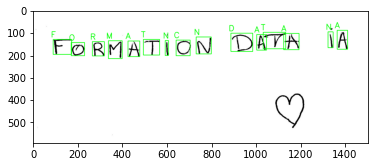

In [2]:
image_path = "./data/RAW/formation0.jpg"
model_path = "./data/OUTPUT/model_A-Z.h5"
F.picture_analysis(image_path, model_path)

## Using Tesseract

In [ ]:
def ocr_core(filename):
    """
    This function will handle the core OCR processing of images.
    """
    text = pytesseract.image_to_string(Image.open(filename))  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
    return text

print(ocr_core(image_path))

# Bonus 2: Reading contents of PDF using OCR (Optical Character Recognition)


In [ ]:
# Path of the pdf 
PDF_file = "../data/FAC0001.pdf"

## Part #1 - Converting PDF to images

In [ ]:
# Store all the pages of the PDF in a variable 
pages = convert_from_path(PDF_file, 500) 
  
# Counter to store images of each page of PDF to image 
image_counter = 1
  
# Iterate through all the pages stored above 
for page in pages: 
    # Declaring filename for each page of PDF as JPG 
    # For each page, filename will be: 
    # PDF page 1 -> page_1.jpg 
    # PDF page 2 -> page_2.jpg 
    # PDF page 3 -> page_3.jpg 
    # .... 
    # PDF page n -> page_n.jpg 
    filename = "../data/images/page_"+str(image_counter)+".jpg"
      
    # Save the image of the page in system 
    page.save(filename, 'JPEG') 
  
    # Increment the counter to update filename 
    image_counter = image_counter + 1

## Part #2 - Recognizing text from the images using OCR

In [ ]:
# Variable to get count of total number of pages 
filelimit = image_counter-1
  
# Creating a text file to write the output 
outfile = "../data/images/out_text.txt"
  
# Open the file in append mode so that  
# All contents of all images are added to the same file 
f = open(outfile, "a") 

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\utilisateur\AppData\Local\Tesseract-OCR\tesseract.exe'  
# Iterate from 1 to total number of pages 
for i in range(1, filelimit + 1): 
  
    # Set filename to recognize text from 
    # Again, these files will be: 
    # page_1.jpg 
    # page_2.jpg 
    # .... 
    # page_n.jpg 
    filename = "../data/images/page_"+str(i)+".jpg"
          
    # Recognize the text as string in image using pytesseract
    text = str(((pytesseract.image_to_string(Image.open(filename))))) 
  
    # The recognized text is stored in variable text 
    # Any string processing may be applied on text 
    # Here, basic formatting has been done: 
    # In many PDFs, at line ending, if a word can't 
    # be written fully, a 'hyphen' is added. 
    # The rest of the word is written in the next line 
    # Eg: This is a sample text this word here GeeksF- 
    # orGeeks is half on first line, remaining on next. 
    # To remove this, we replace every '-\n' to ''. 
    text = text.replace('-\n', '')     
  
    # Finally, write the processed text to the file. 
    f.write(text) 
  
# Close the file after writing all the text. 
f.close()